In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data=pd.read_csv('................')
data.head()
dataset=data.iloc[:,2:].values
yd=data.iloc[:,1].values

In [ ]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [ ]:
data['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [ ]:
yd[5]

'fear'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(yd)

In [ ]:
yt[5]

1

In [ ]:
dataset.shape

(3090, 1)

In [ ]:
y=[]

In [ ]:
for i in range(0,3090):
  if(yt[i]==2):
    y.append(1)
  else:
    y.append(0)

In [ ]:
len(y)

3090

In [ ]:
set(y)

{0, 1}

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


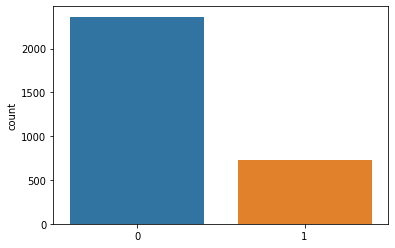

In [ ]:
sns.countplot(y)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,3090):
  review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


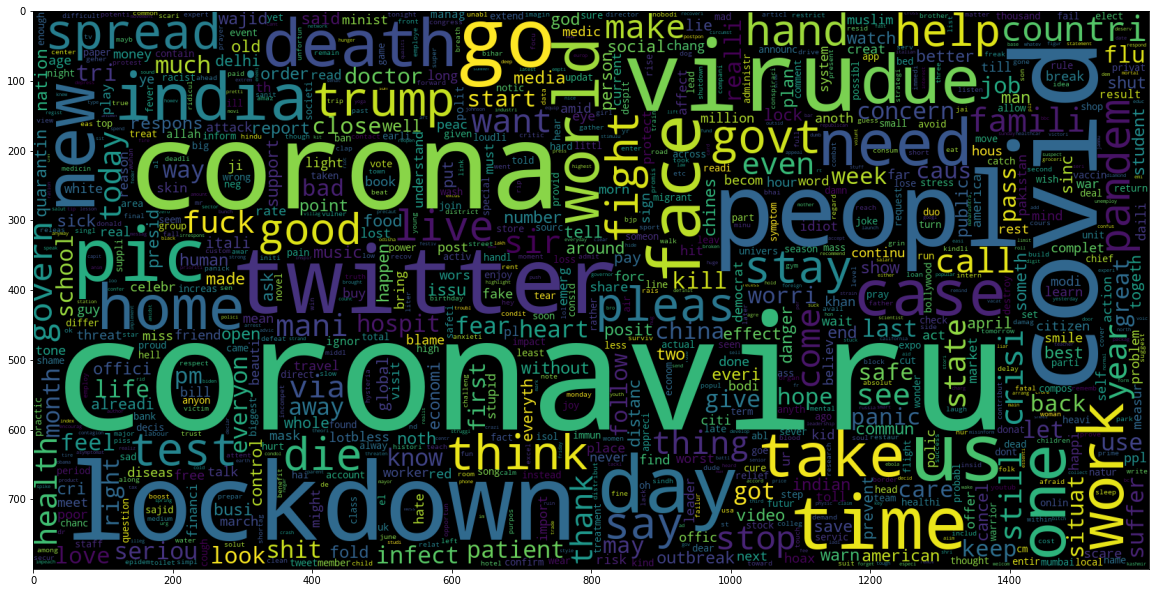

In [ ]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [ ]:
mined=pd.read_csv('.............')
mined.head()


,Unnamed: 0,Text
0,0,#COVID19 death toll breaches 900-mark in #Odisha
1,1,as per this data by @MoHFW_INDIA #Kerala is a...
2,2,Not anymore.. #COVID19 #lockdown #Ontario #Do...
3,3,White House Aids release photos of President #...
4,4,@GovMikeDeWine @LtGovHusted Where is the Praye...


In [ ]:
mined['Text']

0       #COVID19 death toll breaches 900-mark in #Odisha 
1       as per this data by @MoHFW_INDIA  #Kerala is a...
2       Not anymore..  #COVID19 #lockdown #Ontario #Do...
3       White House Aids release photos of President #...
4       @GovMikeDeWine @LtGovHusted Where is the Praye...
                              ...                        
6643    #SuperSpreaderTrump We can hear your breathing...
6644    Trump was a #superspreader of #disinformatin  ...
6645    #LindseyGraham looks like he has #COVID19 #Lin...
6646    ALERT: Raiders fined again for more COVID-19 t...
6647    The Pandemic Archive - Digital Artist Jon Ostr...
Name: Text, Length: 6648, dtype: object

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0,6648):
  review = re.sub('[^a-zA-Z]', ' ', mined['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus1.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x_test = cv.fit_transform(corpus1).toarray()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_Random_small.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred1}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_Logistic_small.csv')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred2}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_naivebayes_small.csv')

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred3}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_LinearSVC_small.csv')

In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred4}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_SGDC_small.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier6=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)
y_pred6=classifier6.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred6}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_decision_small.csv')